# Webscraping

### Installing Beautiful Soup

Install external libraries in Python:

`pip install bs4` <br>

Note:  You do not want to install 'beautifulsoup' as that is version 3 not 4.

### Installing a Parser

`pip install requests` <br>

In [2]:
conda install -c conda-forge bs4

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /Users/tk/opt/miniconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.26 |       hecd8cb5_2         115 KB
    conda-4.10.3               |   py39hecd8cb5_0         2.9 MB
    cryptography-35.0.0        |   py39h2fd3fbb_0         1.1 MB
    ncurses-6.3                |       hca72f7f_2         856 KB
    pycparser-2.21             |     pyhd3eb1b0_0          94 KB
    pyopenssl-21.0.0           |     pyhd3eb1b0_1          49 KB
    setuptools-58.0.4          |   py39hecd8cb5_0         792 KB
    tk-8.6.11                  |       h7bc2e8c_0         3.0 MB
    tqdm-4.62.3                |     pyhd3eb1b0_1          83 KB
    tzdata-2021e               |       hda174b7_0         112 KB
    urllib3-1.26.7             |     pyhd3eb1b0_0         111 KB
    -

In [3]:
conda install -c anaconda requests

Solving environment: done

## Package Plan ##

  environment location: /Users/tk/opt/miniconda3/envs/dat-300-env

  added / updated specs:
    - requests


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         127 KB  anaconda
    idna-2.10                  |             py_0          56 KB  anaconda
    pyopenssl-19.1.0           |             py_1          47 KB  anaconda
    requests-2.24.0            |             py_0          54 KB  anaconda
    urllib3-1.25.11            |             py_0          93 KB  anaconda
    ------------------------------------------------------------
                                           Total:         378 KB

The following NEW packages will be INSTALLED:

  brotlipy           pkgs/main/osx-64::brotlipy-0.7.0-py39h9ed2024_1003
  chardet            pkgs/main/osx-64::chardet-3.0.4-py39hecd8cb5_1003
  cr

In [3]:
## Import packages
import requests
from bs4 import BeautifulSoup ## import BeautifulSoup
import pandas as pd
import seaborn as sns
import itertools ## repeat function for last example
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats ## ANOVA test

### HTML

An HTML element is defined by a start tag, some content, and an end tag.

`<tagname>Content goes here...</tagname>`

Examples of some HTML elements:

`<h1>My First Heading</h1>`  <br>
`<p>My first paragraph.</p>`

### Common HTML Elements:

- `p`: A paragraph of text
- `h1`: A top-level heading
- `h2, h3, …`: A lower-level heading
- `li`: An item in a list
- `img`: Embed an image in an HTML page image
- `tr`: A row in a table
- `td`: A cell in a table
- `a`: A hyperlink
- `href`: specifies the URL the page the `a` link goes to <br>
- `div`: A block of space on the page (generic)
- `span`: A portion of text on the page (generic)
- `meta`: Information about the page that is not shown

### HTML Span:

- The `<span>` element is an inline container used to mark up a part of a text, or a part of a document.
- The `<span>` element has no required attributes, but style, class and id are common.



### Common HTML styles:

- `<b>`: Bold text
- `<strong>`: Important text
- `<i>`: Italic text
- `<em>`: Emphasized text
- `<mark>`: Marked text
- `<small>`: Smaller text
- `<del>`: Deleted text
- `<ins>`: Inserted text
- `<sub>`: Subscript text
- `<sup>`: Superscript text

### HTML Classes:
    
- The HTML class attribute specifies one or more class names for an element
- Classes are used by CSS and JavaScript to select and access specific elements
- The class attribute can be used on any HTML element
- The class name is case sensitive
- Different HTML elements can point to the same class name


### Nested HTML Elements

HTML elements can be nested (this means that elements can contain other elements).

All HTML documents consist of nested HTML elements.

The following example contains four HTML elements (`<html>`, `<body>`, `<h1>` and `<p>`):

    
`<!DOCTYPE html>` <br>
`<html>` <br>
`<body>` <br>

`<h1>My First Heading</h1>` <br> 
`<p>My first paragraph.</p>` <br>

`</body>` <br>
`</html>`


Exaplanation:
- Begin and end with html tags, i.e. `<html>` and `</html>`
- `<body>` begins the body of the document and `</body>` ends the body
- `<h1>` is the heading inside the body element
- `<p>` denotes paragraph

Note:  Don't skip the end tag.  HTML is not case sensitive.

### Viewing Development Tools in Google Chrome

To view the HTML vode in Google Chrome, go to "View" > "Developler" > "Developer Tools."  View the "Elements."

Or: Right click on the webpage and select "Inspect Elements."

## Exploring HTML With BeautifulSoup and Requests

### Making the Soup

First, use `reqests` to get the document behind the URL:

`page = requests.get("web page")`

and then feed that document into Beautiful Soup:

`soup = BeautifulSoup("<html>a web page</html>", 'html.parser')`

Beautiful Soup will convert the document to Unicode and HTML entities are converted to Unicode characters.  Then, Beautiful soup will parse the document.



In [5]:
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify()) # indents for readibility

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


### Tags

A tag object corresponds to an XML or HTML tag in the original document.

Tags may contain strings and other tags. These elements are the tag’s children. Beautiful Soup provides a lot of different attributes for navigating and iterating over a tag’s children.

The simplest way to navigate the parse tree is to say the name of the tag you want. If you want the `<head>` tag, just say `soup.head`.
    
You can zoom in on a certain parts of the parse tree. For example, in the above code, there is a `<p>` part nested within the `<body>` so you can reference the `<p>` by: `soup.body.p`.

In [6]:
print(soup.head, '\n') # will pull everything inside the head tag
print(soup.title, '\n')# will pull everything inside the title tag
print(soup.body.p) # will pull everything in the paragraph (p) inside the body

<head>
<title>A simple example page</title>
</head> 

<title>A simple example page</title> 

<p>Here is some simple content for this page.</p>


A tag's children are available in a list called `.contents`.

In [7]:
soup.contents

['html',
 '\n',
 <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

You can iterate over tag's children using `.children` generator

In [8]:
for child in soup.children:
    print(child)

html


<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>


The `descendants` attribute lets you iterate over all of a tag’s children, recursively: its direct children, the children of its direct children, and so on.

In [9]:
for child in soup.descendants:
    print(child)

html


<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>


<head>
<title>A simple example page</title>
</head>


<title>A simple example page</title>
A simple example page




<body>
<p>Here is some simple content for this page.</p>
</body>


<p>Here is some simple content for this page.</p>
Here is some simple content for this page.






When a tag has only one child, you can make that child a string using the attribute `strings`.

In [10]:
for string in soup.strings:
    print(repr(string))

'\n'
'\n'
'\n'
'A simple example page'
'\n'
'\n'
'\n'
'Here is some simple content for this page.'
'\n'
'\n'


These strings tend to have a lot of extra whitespace, which you can remove by using the `.stripped_strings` generator instead.

In [11]:
for string in soup.stripped_strings:
    print(repr(string))

'A simple example page'
'Here is some simple content for this page.'


Reference the parent of the tag using `.parent`.  

Example: A title string itelf has a parent with the `<title>` tag.

In [13]:
title = soup.title
title.string.parent

<title>A simple example page</title>

Tags at the same level are called `siblings`.

In our example, `title` and `p` are at the same level.

You can iterate between the two using `.next_sibling` and `.previous_sibling`.

### Searching the tree

Two most popular methods: `find()` and `find_all()`.


### find_all() method

Syntax:  `find_all(name, attrs, recursive, string, limit, **kwargs)`

The `find_all()` method scans the entire document looking for results.  `find_all()` uses filters to zoom in on parts of the document.

The simplest filter is a **string**. Pass a string to a search method and Beautiful Soup will perform a match against that exact string.

In [14]:
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
soup = BeautifulSoup(page.content, 'html.parser')

soup.find_all('p') # returns all containers that are p

[<p>Here is some simple content for this page.</p>]

If you pass in a **regular expression** object, Beautiful Soup will filter against that regular expression using its `search()` method.

In [16]:
import re ## import regular expression package

## start with the letter b
for tag in soup.find_all(re.compile("^b")): # anything (container) that starts with b
    print(tag.name)

## contant letter t
for tag in soup.find_all(re.compile("t")): #anthing (container) that contains a t
    print(tag.name)

body
html
title


You can pass in a **list** and Beautiful Soup will allow a string match against any item in that list.

In [17]:
soup.find_all(['title', 'body'])

[<title>A simple example page</title>,
 <body>
 <p>Here is some simple content for this page.</p>
 </body>]

The value `True` matches everything it can. This code finds all the tags in the document, but none of the text strings.

In [18]:
for tag in soup.find_all(True): #find all tags only
    print(tag.name)

html
head
title
body
p


With **string** you can search for strings instead of tags.  Combine with `re.ompile` and you can get all of the tags that contain that string.

In [19]:
soup.find_all(string = re.compile("simple"))

['A simple example page', 'Here is some simple content for this page.']

Pass in a value for **name** and you’ll tell Beautiful Soup to only consider tags with certain names. Text strings will be ignored, as will tags whose names that don’t match.

In [21]:
soup.find_all('title') # note no re.compile

[<title>A simple example page</title>]

**Keyword Arguments** will be turned into a filter on one of a tag’s attributes. If you pass in a value for an argument called id, Beautiful Soup will filter against each tag’s `id` attribute.

For example: 

If you have HTML code that has a `<link2>`id, you can reference using:

`soup.find_all(id = '...')`

If you have HTML code that has a `<href>` attribute you can search on that too:

`soup.find_all(href = '...')`

Searching by **class** is very useful.  You have to use `class_` since Python has reserved the word `class`.  As with any keyword argument, you can pass `class_` a string, a regular expression, a function, or True:



For example:

`soup.find_all("a", class_ = "...")`


With **string** you can search for strings instead of tags. As with name and the keyword arguments, you can pass in a string, a regular expression, a list, a function, or the value True.



In [22]:
soup.find_all("p", string = re.compile("simple"))

[<p>Here is some simple content for this page.</p>]

The **limit** argument will return all the tags and strings that match your filters. This can take a while if the document is large. If you don’t need all the results, you can pass in a number for limit. This works just like the LIMIT keyword in SQL. It tells Beautiful Soup to stop gathering results after it’s found a certain number.

In [23]:
soup.find_all("p", limit = 1)

[<p>Here is some simple content for this page.</p>]

With **recursive argument**, Beautiful Soup will examine all the descendants of mytag: its children, its children’s children, and so on. If you only want Beautiful Soup to consider direct children, you can pass in `recursive=False`.



### find() method

Syntax:  `find(name, attrs, recursive, string, **kwargs)`

`find()` method will return one result, not a list of results.

In [25]:
soup.find("head").find("title")

<title>A simple example page</title>

## Weather Data Example

Let's download extended forecast data from the National Weather Service:  https://forecast.weather.gov/MapClick.php?lat=33.4255&lon=-111.9372.

### Inspecting

The page has information about the extended forecast for the next week, including time of day, temperature, and a brief description of the conditions.

First inspect the page using Chrome DevTools by going to `View > Developer > Developer Tools`. Make sure the `Elements` panel is highlighted.  The `Elements` panel will show you the HTML tags on the page and help you navigate them.

By right clicking on the page near where it says “Extended Forecast”, then clicking “Inspect”, we’ll open up the tag that contains the text “Extended Forecast” in the elements panel.

We can then scroll up in the elements panel to find the “outermost” element that contains all of the text that corresponds to the extended forecasts.  You should see:  `<div id="seven-day-faorecast" class="panel panel-default"> == $0`.

Each of the forecast item is contained in a `div` with class `tombstone- container`.





### Webscraping

Getting data steps:
1. Download web page containing the forecast
2. Create `BeautifulSoup` class to parse the page
3. Find `div` with id `seven-day-forecast` and assign to `seven_day`
4. Inside `seven_day` find each individual forecast item
5. Extra and print the first forecast item

In [31]:
page = requests.get("https://forecast.weather.gov/MapClick.php?lat=33.4255&lon=-111.9372")
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup)
seven_day = soup.find(id="seven-day-forecast") # div with id "seven day forecast"
#print(seven_day)
forecast_items = seven_day.find_all(class_="tombstone-container") # use find all here because we want ALL the tombstone containers
#print(forecast_items)
tonight = forecast_items[0] # just print the first tombstone container
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Tonight
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Tonight: Mostly cloudy, with a low around 61. East northeast wind around 5 mph becoming calm  in the evening. " class="forecast-icon" src="newimages/medium/nbkn.png" title="Tonight: Mostly cloudy, with a low around 61. East northeast wind around 5 mph becoming calm  in the evening. "/>
 </p>
 <p class="short-desc">
  Mostly Cloudy
 </p>
 <p class="temp temp-low">
  Low: 61 °F
 </p>
</div>


What items can you extract?:

1. The name of the forecast via `period-name`
2. The description of the conditions such as `title` property of `img`
3. Short description of the conditions via `short-desc`
4. Temperature via `temp`

In [32]:
period = tonight.find(class_="period-name").get_text() # gives "Tonight" string
short_desc = tonight.find(class_="short-desc").get_text() # gives "Mostly Cloudy" string
temp = tonight.find(class_="temp").get_text() # gives temp string under this class
print(period)
print(short_desc)
print(temp)

Tonight
Mostly Cloudy
Low: 61 °F


Extract the `title` attribute from the `img` tag using BeautifulSoup object like a dictionary.

In [33]:
img = tonight.find("img") 
desc = img['title'] # title within img
print(desc)

Tonight: Mostly cloudy, with a low around 61. East northeast wind around 5 mph becoming calm  in the evening. 


Now that we know how to extract each individual piece of information, we can combine our knowledge with CSS selectors and list comprehensions to extract everything at once.

We will:

- Select all items with the class `period-name` inside an item with class `tombstone container` in `seven_day`
- Use a list comprehension to call the `get_text` method on each `BeautifulSoup` object

In [34]:
## Get the period names, in order

period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Tonight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday',
 'WednesdayNight',
 'ThanksgivingDay',
 'ThursdayNight',
 'Friday',
 'FridayNight']

In [35]:
## Get other three fields

short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Mostly Cloudy', 'Cloudy thenSlight ChanceShowers', 'ChanceShowers', 'Mostly Sunny', 'Clear', 'Sunny', 'Clear', 'Sunny', 'Partly Cloudy']
['Low: 61 °F', 'High: 79 °F', 'Low: 57 °F', 'High: 75 °F', 'Low: 52 °F', 'High: 76 °F', 'Low: 51 °F', 'High: 78 °F', 'Low: 52 °F']
['Tonight: Mostly cloudy, with a low around 61. East northeast wind around 5 mph becoming calm  in the evening. ', 'Tuesday: A 20 percent chance of showers after 3pm.  Cloudy, with a high near 79. Calm wind becoming east around 5 mph. ', 'Tuesday Night: A 30 percent chance of showers.  Mostly cloudy, with a low around 57. Calm wind. ', 'Wednesday: Mostly sunny, with a high near 75. Calm wind becoming southwest around 5 mph. ', 'Wednesday Night: Clear, with a low around 52. Calm wind becoming northeast around 5 mph in the evening. ', 'Thanksgiving Day: Sunny, with a high near 76. East northeast wind 5 to 10 mph. ', 'Thursday Night: Clear, with a low around 51. Northeast wind 5 to 10 mph. ', 'Friday: Sunny, with a high nea

### Combining our data into a Pandas Dataframe

We can now combine the data into a Pandas DataFrame and analyze it.

In order to do this, we’ll call the DataFrame class, and pass in each list of items that we have. We pass them in as part of a dictionary.

Each dictionary key will become a column in the DataFrame, and each list will become the values in the column.

In [36]:
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})
weather

,period,short_desc,temp,desc
0,Tonight,Mostly Cloudy,Low: 61 °F,"Tonight: Mostly cloudy, with a low around 61. ..."
1,Tuesday,Cloudy thenSlight ChanceShowers,High: 79 °F,Tuesday: A 20 percent chance of showers after ...
2,TuesdayNight,ChanceShowers,Low: 57 °F,Tuesday Night: A 30 percent chance of showers....
3,Wednesday,Mostly Sunny,High: 75 °F,"Wednesday: Mostly sunny, with a high near 75. ..."
4,WednesdayNight,Clear,Low: 52 °F,"Wednesday Night: Clear, with a low around 52. ..."
5,ThanksgivingDay,Sunny,High: 76 °F,"Thanksgiving Day: Sunny, with a high near 76. ..."
6,ThursdayNight,Clear,Low: 51 °F,"Thursday Night: Clear, with a low around 51. N..."
7,Friday,Sunny,High: 78 °F,"Friday: Sunny, with a high near 78. East north..."
8,FridayNight,Partly Cloudy,Low: 52 °F,"Friday Night: Partly cloudy, with a low around..."


Run analysis on the dataframe:

In [37]:
## Extract temperatures

temp_nums = weather["temp"].str.split(' ').str[1] # based on splitting by space, getting string at index 1
weather["temp_num"] = temp_nums.astype('int')
weather

,period,short_desc,temp,desc,temp_num
0,Tonight,Mostly Cloudy,Low: 61 °F,"Tonight: Mostly cloudy, with a low around 61. ...",61
1,Tuesday,Cloudy thenSlight ChanceShowers,High: 79 °F,Tuesday: A 20 percent chance of showers after ...,79
2,TuesdayNight,ChanceShowers,Low: 57 °F,Tuesday Night: A 30 percent chance of showers....,57
3,Wednesday,Mostly Sunny,High: 75 °F,"Wednesday: Mostly sunny, with a high near 75. ...",75
4,WednesdayNight,Clear,Low: 52 °F,"Wednesday Night: Clear, with a low around 52. ...",52
5,ThanksgivingDay,Sunny,High: 76 °F,"Thanksgiving Day: Sunny, with a high near 76. ...",76
6,ThursdayNight,Clear,Low: 51 °F,"Thursday Night: Clear, with a low around 51. N...",51
7,Friday,Sunny,High: 78 °F,"Friday: Sunny, with a high near 78. East north...",78
8,FridayNight,Partly Cloudy,Low: 52 °F,"Friday Night: Partly cloudy, with a low around...",52


In [38]:
## find average and standard deviation

print(weather["temp_num"].mean())
print(weather["temp_num"].std())

64.55555555555556
12.238373167123878


In [39]:
## select only night time rows

is_night = weather["temp"].str.contains("Low")
weather["is_night"] = is_night
is_night

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
Name: temp, dtype: bool

In [40]:
## result based on boolean operator

weather[is_night]

,period,short_desc,temp,desc,temp_num,is_night
0,Tonight,Mostly Cloudy,Low: 61 °F,"Tonight: Mostly cloudy, with a low around 61. ...",61,True
2,TuesdayNight,ChanceShowers,Low: 57 °F,Tuesday Night: A 30 percent chance of showers....,57,True
4,WednesdayNight,Clear,Low: 52 °F,"Wednesday Night: Clear, with a low around 52. ...",52,True
6,ThursdayNight,Clear,Low: 51 °F,"Thursday Night: Clear, with a low around 51. N...",51,True
8,FridayNight,Partly Cloudy,Low: 52 °F,"Friday Night: Partly cloudy, with a low around...",52,True


In [41]:
weather[is_night]["temp_num"].mean() # select is night col and mean off "temp_num" col

54.6

### Example 2: Webscraping Wikipedia

In [42]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_Peaky_Blinders_episodes")
soup = BeautifulSoup(page.content, 'html.parser')
body = soup.find(id = "mw-content-text")

seasonTables = body.find_all("table", {"class": "wikitable plainrowheaders wikiepisodetable"}) # looking for all tables that have this class

episodeList = []
for seasons in seasonTables:
    for items in seasons:
        vevents = items.find_all("tr", {"class": "vevent"})
        for attributes in vevents:
            episodeList.append(attributes.find_all(text=True))

pb_data = pd.DataFrame(episodeList)
pb_df = pb_data.drop(pb_data.columns[[6, 8]], axis=1) 
pb_df.columns = ['No_Overall', 'No_Series', 'Episode', 'Director', 'Writer', 'Air_Date', 'Air_Date_Num', 'UK_Viewers']
season = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]
pb_df.insert(1, 'Season', season)
pb_df["UK_Viewers"] = pb_df["UK_Viewers"].astype(float) # d=pay attention to data types and convert to numerics as needed
pb_df

,No_Overall,Season,No_Series,Episode,Director,Writer,Air_Date,Air_Date_Num,UK_Viewers
0,1,1,1,Episode 1,Otto Bathurst,Steven Knight,12 September 2013,2013-09-12,3.05
1,2,1,2,Episode 2,Otto Bathurst,Steven Knight,19 September 2013,2013-09-19,2.45
2,3,1,3,Episode 3,Otto Bathurst,Steven Knight,26 September 2013,2013-09-26,2.20
3,4,1,4,Episode 4,Tom Harper,"Steven Knight, Stephen Russell",3 October 2013,2013-10-03,2.31
4,5,1,5,Episode 5,Tom Harper,"Steven Knight, Toby Finlay",10 October 2013,2013-10-10,2.03
5,6,1,6,Episode 6,Tom Harper,Steven Knight,17 October 2013,2013-10-17,2.24
6,7,2,1,Episode 1,Colm McCarthy,Steven Knight,2 October 2014,2014-10-02,2.31
7,8,2,2,Episode 2,Colm McCarthy,Steven Knight,9 October 2014,2014-10-09,2.18
8,9,2,3,Episode 3,Colm McCarthy,Steven Knight,16 October 2014,2014-10-16,2.20
9,10,2,4,Episode 4,Colm McCarthy,Steven Knight,23 October 2014,2014-10-23,2.06


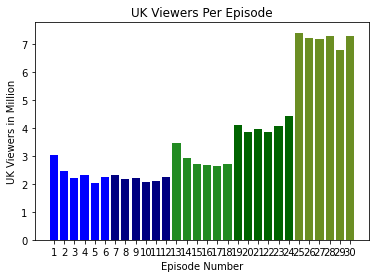

In [43]:
plt.bar("No_Overall", "UK_Viewers", width = 0.8, bottom = None, align = 'center', data = pb_df,
       color = ["b", "b", "b", "b", "b", "b", "navy", "navy", "navy", "navy", "navy", "navy",
               "forestgreen", "forestgreen", "forestgreen", "forestgreen", "forestgreen", "forestgreen", 
               "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen",
               "olivedrab", "olivedrab", "olivedrab", "olivedrab", "olivedrab", "olivedrab"])
plt.title("UK Viewers Per Episode")
plt.xlabel("Episode Number")
plt.ylabel("UK Viewers in Million")
plt.show()

In [44]:
pb_df.groupby("Season").mean("UK_Viewers")

,UK_Viewers
Season,
1,2.380000
2,2.181667
3,2.853333
4,4.051667
5,7.196667


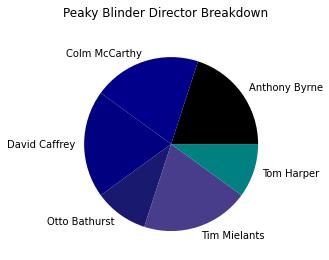

In [45]:
pb_dcnt = pb_df.groupby(["Director"]).count()["Episode"].reset_index()

colors = ["black", "darkblue", "navy", "midnightblue", "darkslateblue", 
          "teal", "darkcyan", "lightseagreen", "mediumaquamarine", "aquamarine"]
plt.pie(pb_dcnt["Episode"], labels = pb_dcnt["Director"], colors = colors)
plt.suptitle("Peaky Blinder Director Breakdown")
plt.show()

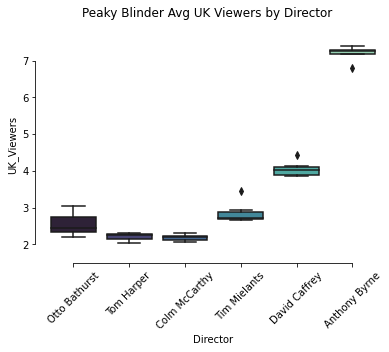

In [46]:
sns.boxplot(x = "Director", y = "UK_Viewers", palette = "mako", data = pb_df)
sns.despine(offset = 10, trim = True)
plt.xticks(rotation = 45)
plt.suptitle("Peaky Blinder Avg UK Viewers by Director")
plt.show()

In [47]:
stats.f_oneway(pb_df['UK_Viewers'][pb_df['Director'] == 'Otto Bathurst'], # y , x == ________
               pb_df['UK_Viewers'][pb_df['Director'] == 'Tom Harper'],
               pb_df['UK_Viewers'][pb_df['Director'] == 'Colm McCarthy'],
               pb_df['UK_Viewers'][pb_df['Director'] == 'Tim Mielants'],
               pb_df['UK_Viewers'][pb_df['Director'] == 'David Caffrey'],
               pb_df['UK_Viewers'][pb_df['Director'] == 'Anthony Byrne'])

F_onewayResult(statistic=347.28608257332695, pvalue=1.4667398395634852e-21)

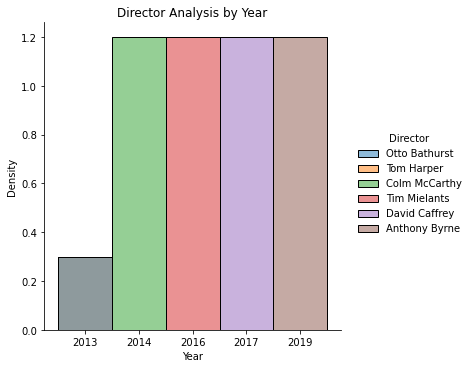

In [48]:
pb_df['Year'] = pb_df['Air_Date_Num'].astype(str).str[0:4]
sns.displot(data = pb_df, x = "Year", hue = "Director", stat = "frequency")
plt.title('Director Analysis by Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

### Exercise

In [4]:
## pull in data via webscraping
## delete move, row 52

page = requests.get("https://en.wikipedia.org/wiki/List_of_Downton_Abbey_episodes")
soup = BeautifulSoup(page.content, 'html.parser')
body = soup.find(id = "mw-content-text")
daTable = body.find_all("table", {"class": "wikitable plainrowheaders wikiepisodetable"})


In [18]:
## clean data, change rows 3 and 5 to be consistent with the dataset
episodeTable=[]
for thing1 in daTable:
    for thing2 in thing1:
        vevent = thing2.find_all("tr", {"class":"vevent"})
        for thing3 in vevent:
            episodeTable.append(thing3.find_all(text=True))
downAbbyDF = pd.DataFrame(episodeTable)
downAbbyDF.
## add column names 


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,"""Episode One""",Brian Percival,Julian Fellowes,26 September 2010,(,2010-09-26,),9.25,None,None,None
1,2,2,"""Episode Two""",Ben Bolt,Julian Fellowes,3 October 2010,(,2010-10-03,),9.97,None,None,None
2,3,3,"""Episode Three""",Ben Bolt,Julian Fellowes,10 October 2010,(,2010-10-10,),8.97,None,None,None
3,4,4,"""Episode Four""",Brian Kelly,"Julian Fellowes,",Shelagh Stephenson,17 October 2010,(,2010-10-17,),9.70,None,None
4,5,5,"""Episode Five""",Brian Kelly,Julian Fellowes,24 October 2010,(,2010-10-24,),9.40,None,None,None
5,6,6,"""Episode Six""",Brian Percival,"Julian Fellowes,",Tina Pepler,31 October 2010,(,2010-10-31,),9.84,None,None
6,7,7,"""Episode Seven""",Brian Percival,Julian Fellowes,7 November 2010,(,2010-11-07,),10.77,None,None,None
7,8,1,"""Episode One""",Ashley Pearce,Julian Fellowes,18 September 2011,(,2011-09-18,),11.41,None,None,None
8,9,2,"""Episode Two""",Ashley Pearce,Julian Fellowes,25 September 2011,(,2011-09-25,),11.77,[nb 1],None,None
9,10,3,"""Episode Three""",Andy Goddard,Julian Fellowes,2 October 2011,(,2011-10-02,),11.33,[nb 2],None,None


In [ ]:
## find mean and standard deviation


In [ ]:
## create some plot that shows the UK Viewers per Director


In [15]:
page = requests.get("https://en.wikipedia.org/wiki/What_We_Do_in_the_Shadows_(TV_series)")
soup = BeautifulSoup(page.content, 'html.parser')
body = soup.find(id="mw-content-text")

seasonTables = body.find_all("table", {"class": "wikitable plainrowheaders wikiepisodetable"})

episodeList=[]
for season in seasonTables:
    for item in season:
        vevents = item.find_all("tr", {"class":"vevent"})
        for attributes in vevents:
            episodeList.append(attributes.find_all(text=True))

vampireDf = pd.DataFrame(episodeList)  
vampireDf


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,"""Pilot""",Taika Waititi,Jemaine Clement,"March 27, 2019",(,2019-03-27,),XWS01001,0.617,[12]
1,2,2,"""City Council""",Jemaine Clement,Paul Simms,"April 3, 2019",(,2019-04-03,),XWS01002,0.658,[13]
2,3,3,"""Werewolf Feud""",Jemaine Clement,Josh Lieb,"April 10, 2019",(,2019-04-10,),XWS01004,0.305,[14]
3,4,4,"""Manhattan Night Club""",Jemaine Clement,Tom Scharpling,"April 17, 2019",(,2019-04-17,),XWS01003,0.439,[15]
4,5,5,"""Animal Control""",Jackie van Beek,Duncan Sarkies,"April 24, 2019",(,2019-04-24,),XWS01008,0.320,[16]
5,6,6,"""Baron's Night Out""",Jackie van Beek,Iain Morris,"May 1, 2019",(,2019-05-01,),XWS01005,0.418,[17]
6,7,7,"""The Trial""",Taika Waititi,Jemaine Clement,"May 8, 2019",(,2019-05-08,),XWS01006,0.527,[18]
7,8,8,"""Citizenship""",Jason Woliner,Stefani Robinson,"May 15, 2019",(,2019-05-15,),XWS01007,0.522,[19]
8,9,9,"""The Orgy""",Jason Woliner,Marika Sawyer,"May 22, 2019",(,2019-05-22,),XWS01009,0.434,[20]
9,10,10,"""Ancestry""",Taika Waititi,Jemaine Clement & Stefani Robinson & Tom Schar...,"May 29, 2019",(,2019-05-29,),XWS01010,0.427,[21]
